In [44]:
library(regioneR)
library(rtracklayer)
library(ggplot2)
library(tidyr)
library(dplyr)
library(annotatr)
library(flipPlots)
library(plotly)
library(rtracklayer)
library(BSgenome.Hsapiens.UCSC.hg19)
library(GenomicRanges)
library(GenomicFeatures)

# Import Data

## Mappability bed file

The mappability bed file specifies the regions where the sequencing strategy can detect cleavage events.

In [3]:
map_bed <- toGRanges(read.table('/home/jupyter/human-TF-footprinting/Data/mappability.stranded.hg38.bed',
                                sep='\t'))

In [142]:
map_bed_chr19 <- map_bed[map_bed@seqnames == 'chr19']

## Consensus

In [2]:
consensus_bed <- toGRanges(read.table('/home/jupyter/human-TF-footprinting/Data/consensus_footprints_and_collapsed_motifs_hg38.bed',
                                sep='\t'))

In [3]:
consensus_bed_chr19 <- consensus_bed[consensus_bed@seqnames == 'chr19']

## CD20 Footprints 

In [4]:
cd20_beds <- list(cd20_0.0001 = toGRanges(read.table('/home/jupyter/human-TF-footprinting/Data/interval.all.fps.0.0001.bed', sep='\t')),
                  cd20_0.001 = toGRanges(read.table('/home/jupyter/human-TF-footprinting/Data/interval.all.fps.0.001.bed',sep='\t')),
                  cd20_0.01 = toGRanges(read.table('/home/jupyter/human-TF-footprinting/Data/interval.all.fps.0.01.bed',sep='\t')),
                  cd20_0.05 = toGRanges(read.table('/home/jupyter/human-TF-footprinting/Data/interval.all.fps.0.05.bed',sep='\t')))

In [5]:
for (bed_df in names(cd20_beds)) {
    cd20_beds[[bed_df]] <- cd20_beds[[bed_df]][cd20_beds[[bed_df]]@seqnames == "chr19"]
}

## Interval.all.bedgraph

Per-nucleotide footprint statistics

In [34]:
cd20_all <- toGRanges('/home/jupyter/human-TF-footprinting/Data/interval.all.bedgraph')

In [35]:
cd20_all_chr19 <- cd20_all[cd20_all@seqnames == 'chr19']

# Consensus Analysis

In [72]:
consensus.analysis <- function(bed_list,
                               map_bed,
                               consensus_bed){
    
    print(paste('Number of regions in mappable regions: ', nrow(toDataframe(map_bed)), 
                sep=' '))
    
    cat('\n')

    print(paste('Number of regions in the consensus: ', nrow(toDataframe(consensus_bed)), 
                sep=' '))
    
    cat('\n')

    
    # number of regions in dataset of interest
    for (bed_df in names(bed_list)) {
        print(paste(bed_df, 'number of regions:', nrow(toDataframe(bed_list[[bed_df]])), sep=' '))
    }
    
    cat('\n')
    
    # check if the dataset of interest is a proper subset of mappable regions
        for (bed_df in names(bed_list)) {
            print(bed_df)
            print(paste('Number of overlaps in mappable regions:',
                        numOverlaps(bed_list[[bed_df]], 
                                    map_bed, 
                                    count.once=TRUE), sep=' '))
            print(paste('Number of overlaps in consensus:', 
                        numOverlaps(bed_list[[bed_df]], 
                                    consensus_bed, 
                                    count.once=TRUE), sep=' '))
            cat('\n')

        }
    
}

# consensus.analysis(cd20_beds, map_bed, consensus_bed)
# Subset cd20+ bcells to Chr19
for (bed_df in names(cd20_beds)) {
    cd20_beds[[bed_df]] <- cd20_beds[[bed_df]][cd20_beds[[bed_df]]@seqnames == "chr19"]
}
consensus.analysis(cd20_beds, map_bed_chr19, consensus_bed_chr19) # cd20_beds filtered to chr19

# Export chr19 subset data
# write.table(map_bed_chr19, "/home/jupyter/human-TF-footprinting/Data/mappability.stranded.hg38.chr19.bed", append = TRUE, sep = "")
# write.table(consensus_bed_chr19, "/home/jupyter/human-TF-footprinting/Data/consensus_footprints_and_collapsed_motifs_hg38_chr19.bed", append = TRUE, sep = "")
# write.table(cd20_all_chr19, "/home/jupyter/human-TF-footprinting/Data/interval.all.chr19.bed", append = TRUE, sep = "")

[1] "Number of regions in mappable regions:  1833378"

[1] "Number of regions in the consensus:  126666"

[1] "cd20_0.0001 number of regions: 9661"
[1] "cd20_0.001 number of regions: 14646"
[1] "cd20_0.01 number of regions: 28221"
[1] "cd20_0.05 number of regions: 50162"

[1] "cd20_0.0001"
[1] "Number of overlaps in mappable regions: 9554"
[1] "Number of overlaps in consensus: 9146"

[1] "cd20_0.001"
[1] "Number of overlaps in mappable regions: 14479"
[1] "Number of overlaps in consensus: 13126"

[1] "cd20_0.01"
[1] "Number of overlaps in mappable regions: 27879"
[1] "Number of overlaps in consensus: 21812"

[1] "cd20_0.05"
[1] "Number of overlaps in mappable regions: 49551"
[1] "Number of overlaps in consensus: 32613"



In [9]:
avg_numsamples_per_chr.names <- unlist(unique(consensus_bed@seqnames))
avg_numsamples_per_chr <- rep(NA, length(avg_numsamples_per_chr.names))
names(avg_numsamples_per_chr) <- avg_numsamples_per_chr.names
for (chr in unique(consensus_bed@seqnames)){
    avg_numsamples_per_chr[[chr]] <- mean(consensus_bed[consensus_bed@seqnames == chr]$V6)
}
avg_numsamples_per_chr_df <- data.frame(avg_numsamples_per_chr)

In [11]:
avg_numsamples_per_chr_df

,avg_numsamples_per_chr
,<dbl>
chr1,11.598195
chr10,9.776064
chr11,11.466149
chr12,11.159547
chr13,8.410232
chr14,10.931864
chr15,10.934215
chr16,12.371862
chr17,13.943751


# Boxplot Analysis

In [109]:
dhs.boxplot <- function(boxplot_df,
                       title,
                       x_label,
                       y_label){
    ggplot(boxplot_df, aes(x=X, y=Y)) +
    geom_boxplot(outlier.shape = NA) + coord_cartesian(ylim = quantile(boxplot_df$Y, c(0.01, .94))) +
    theme(axis.text.x=element_text(angle=45,margin = margin(1, unit = "cm"),vjust =1)) + 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          panel.background = element_blank(), axis.line = element_line(colour = "black")) + 
    labs(title=title,
         x=x_label,
         y=y_label)
}

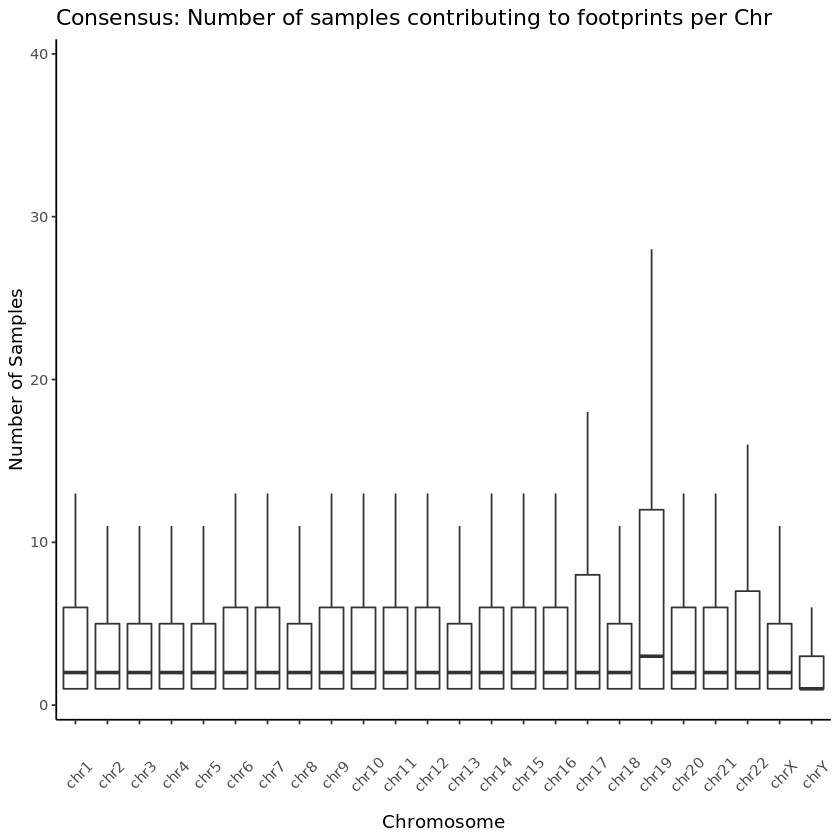

In [19]:
consensus_boxplot_df <- data.frame(X=consensus_bed@seqnames,Y=consensus_bed$V6)
rename.chr <- paste(rep('chr',24),seq(1, 24, by=1),sep='')
rename.chr[[24]] <- 'chrY'
rename.chr[[23]] <- 'chrX'
consensus_boxplot_df$X <- factor(consensus_boxplot_df$X, levels=rename.chr)

dhs.boxplot(consensus_boxplot_df,
           "Consensus: Number of samples contributing to footprints per Chr",
           "Chromosome",
           "Number of Samples")

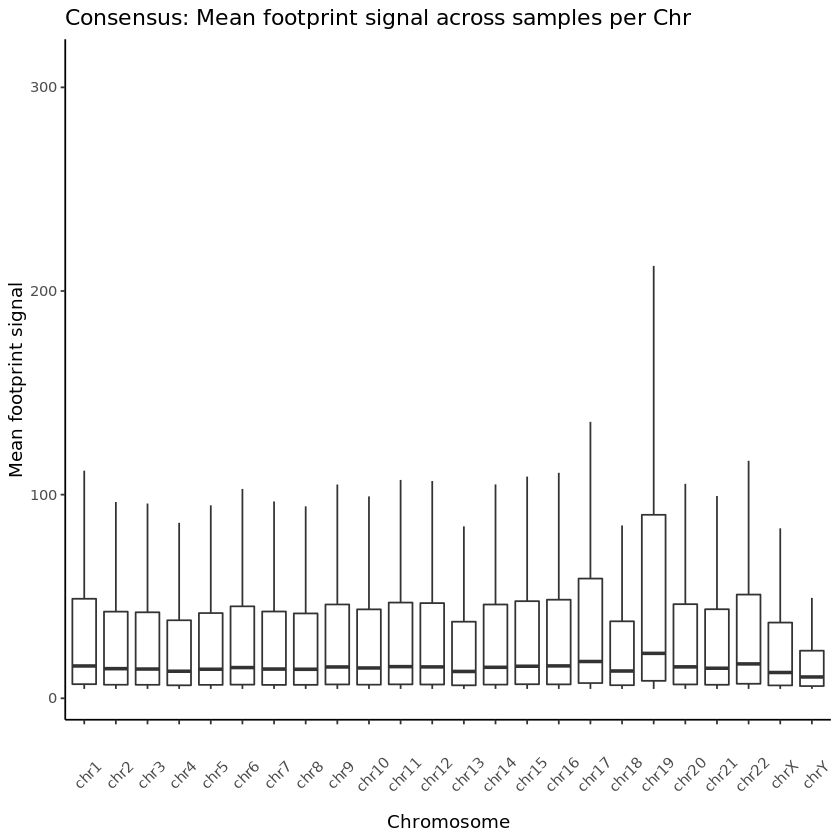

In [20]:
consensus_boxplot_df <- data.frame(X=consensus_bed@seqnames,Y=consensus_bed$V5)
rename.chr <- paste(rep('chr',24),seq(1, 24, by=1),sep='')
rename.chr[[24]] <- 'chrY'
rename.chr[[23]] <- 'chrX'
consensus_boxplot_df$X <- factor(consensus_boxplot_df$X, levels=rename.chr)

dhs.boxplot(consensus_boxplot_df,
           "Consensus: Mean footprint signal across samples per Chr",
           "Chromosome",
           "Mean footprint signal")

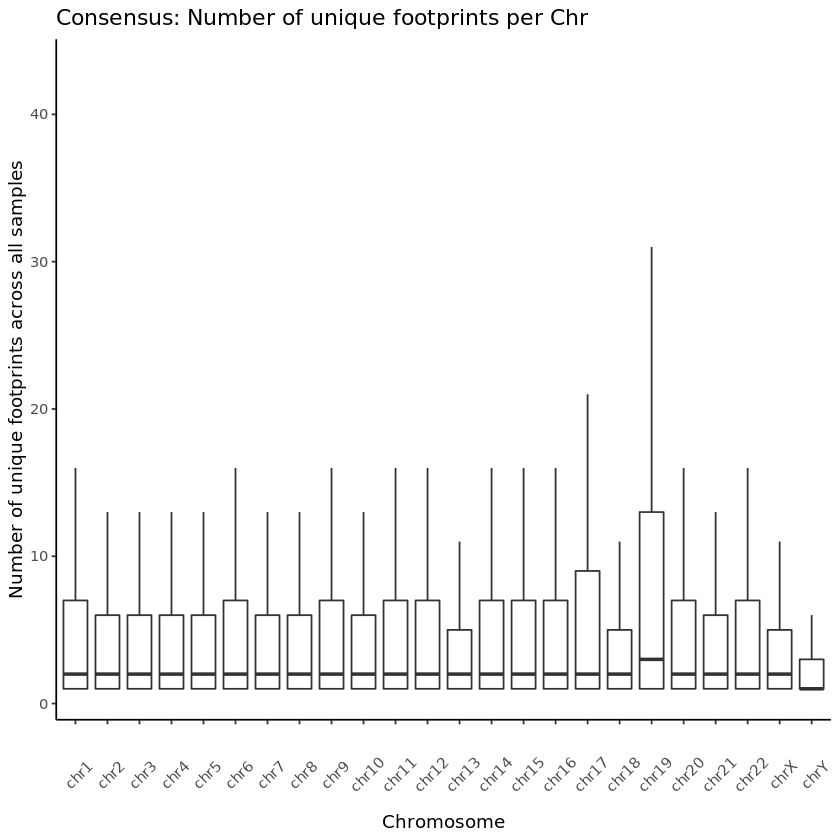

In [110]:
consensus_boxplot_df <- data.frame(X=consensus_bed@seqnames,Y=consensus_bed$V7)
rename.chr <- paste(rep('chr',24),seq(1, 24, by=1),sep='')
rename.chr[[24]] <- 'chrY'
rename.chr[[23]] <- 'chrX'
consensus_boxplot_df$X <- factor(consensus_boxplot_df$X, levels=rename.chr)


dhs.boxplot(consensus_boxplot_df,
           "Consensus: Number of unique footprints per Chr",
           "Chromosome",
           "Number of unique footprints across all samples")


In [48]:
count_footprint_per_chr.names <- unlist(unique(cd20_beds[['cd20_0.0001']]@seqnames))
count_footprint_per_chr <- rep(NA, length(count_footprint_per_chr.names))
names(count_footprint_per_chr) <- count_footprint_per_chr.names

for (chr in unique(cd20_beds[['cd20_0.0001']]@seqnames)){
    count_footprint_per_chr[chr] <- nrow(toDataframe(cd20_beds[['cd20_0.0001']][cd20_beds[['cd20_0.0001']]@seqnames == chr]))
}
count_footprint_per_chr_df <- data.frame(count_footprint_per_chr)

rename.chr <- paste(rep('chr',24),seq(1, 24, by=1),sep='')
rename.chr[[24]] <- 'chrY'
rename.chr[[23]] <- 'chrX'
count_footprint_per_chr_df$chr <- row.names(count_footprint_per_chr_df)
count_footprint_per_chr_df$chr <- factor(count_footprint_per_chr_df$chr, levels=rename.chr)

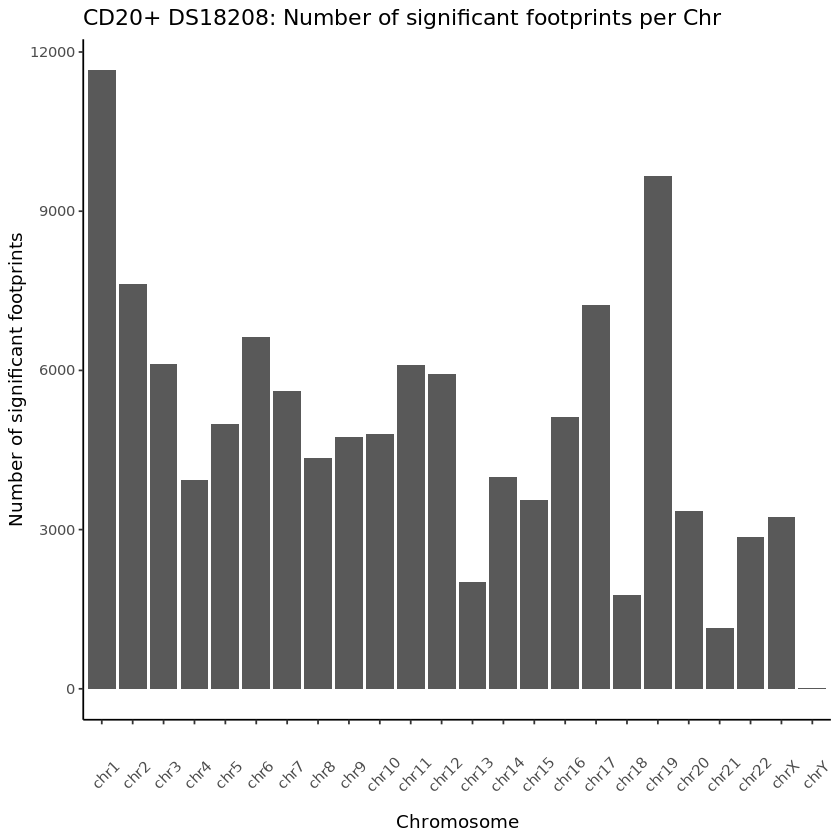

In [63]:
ggplot(data=count_footprint_per_chr_df, aes(x=chr, y=count_footprint_per_chr)) +
  geom_bar(stat="identity") +
    theme(axis.text.x=element_text(angle=45,margin = margin(1, unit = "cm"),vjust =1)) + 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      panel.background = element_blank(), axis.line = element_line(colour = "black"))+ 
    labs(title='CD20+ DS18208: Number of significant footprints per Chr',
         x='Chromosome',
         y='Number of significant footprints')

# CpG Analysis

In [53]:
HeatedDensityPlot <- function(x,
                              title = "",
                              x.title = "x",
                              colors = c('#d7191c','#fdae61','#ffffbf','#abdda4','#2b83ba'),
                              show.legend = TRUE, 
                              legend.title = "Cumulative %", 
                              n = 512, # Number of unique values of x in the heatmap/density estimation
                              n.breaks = 5, # Number of values of x to show on the x-axis. Final number may differ.
                              ...)
{
    # Checking inputs.
    n.obs <- length(x)
    if (any(nas <- is.na(x))) {
        warning(sum(nas), " observations with missing values have been removed.")
        x <- x[!nas]
        n.obs <- length(x)
    }
    if (n.obs < 4)
        stop(n.obs, " is too few observations for a valid density plot. See Silverman (1986) Density Estimation for Statistics and Data Analysis.")
    # Computing densities
    dens <- density(x, ...)
    y.max <- max(dens$y) * 1.1 # To ensure top of plot isn't too close to title
    x.to.plot.true <- x.to.plot <- dens$x
    y.seq <- c(0, y.max/2, y.max)
    y.to.plot <- dens$y
    range.x = range(x)
    cum.dens <- ecdf(x)(x.to.plot)# * 100
    #Due to plotly blug that misaligns heatmap with ensuing white line,
    #putting blanks at beginnig of data.
    n.blanks <- 10
    cum.dens <- c(rep(NA, n.blanks), cum.dens)
    diff <- x.to.plot[1] - x.to.plot[2]
    blanks <- diff * (n.blanks:1) + x.to.plot[1]
    x.to.plot <- c(blanks, x.to.plot)
    y.to.plot <- c(rep(0, n.blanks), y.to.plot)
    # Creating the matrix of heatmap values
    cum.perc <- cum.dens * 100
    z.mat <- matrix(cum.perc, byrow = TRUE, nrow = 3, ncol = n + n.blanks,
                    dimnames = list(y = y.seq, x = x.to.plot))
    # Specifying the colors
    col.fun <- scales::col_numeric(colors, domain = 0:1, na.color = "white")#range.x)
    x.as.colors <- col.fun(cum.dens)
    z.to.plot.scaled <- scales::rescale(cum.perc)
    color.lookup <- setNames(data.frame(z.to.plot.scaled, x.as.colors), NULL)
    # Creating the base heatmap.
    require(plotly)
    p <- plot_ly(z = z.mat,
                 xsrc = x.to.plot,
                 ysrc = y.seq,
                 type = "heatmap",
                 colorscale = color.lookup,
                 cauto = FALSE,
                 hoverinfo = "none",
                  colorbar = list(title = legend.title),
                 showscale = show.legend)
    # Placing white on top of the bits of the heatmap to hide
    p <- add_trace(p,
                   x = c(1:(n + n.blanks), (n + n.blanks):1),
                   y = c(y.to.plot, rep(y.max * 1.10, n + n.blanks)),
                   fill = "tonexty",
                   hoverinfo = "none",
                   showlegend = FALSE,
                   type = "scatter",
                   mode = "line",
                   showscale = FALSE, 
                   line = list(color = "white", width = 0),
                   fillcolor = "white")
    # Adding the tooltips
    p <- add_trace(p,
                   x = 1:(n + n.blanks),
                   y = y.to.plot,
                   name = "",
                   hoverinfo = "text",
                   text = sprintf(paste0(x.title,": %.0f %% < %.1f"), cum.perc, x.to.plot),
                   type = "scatter",
                   mode = "lines",
                   line = list(color = "white", width = 0),
                   showlegend=FALSE, 
                   showscale=FALSE)
    p <- plotly::config(p, displayModeBar = FALSE)
    # Formatting the x axis
    x.text <- pretty(x.to.plot, n = n.breaks)
    x.tick <- 1 + (x.text - x.to.plot[1]) / (x.to.plot[n + n.blanks] - x.to.plot[1]) * (n + n.blanks - 1)
    p <- layout(p, title = title,
                xaxis = list(title = x.title, tickmode = "array", tickvals = x.tick, ticktext = x.text),
                yaxis = list(title = "", showline = FALSE, ticks = "", showticklabels = FALSE, range= c(0, y.max)),
                margin = list(t = 30, l = 5, b = 50, r = 5))
    p
}

In [29]:
annotations = build_annotations(genome = 'hg38', annotations = c('hg38_cpgs'))

Building CpG islands...

Building CpG shores...

Building CpG shelves...

Building inter-CpG-islands...



In [24]:
# subset to genomic interval of interest
genomic_interval_sub <- GRanges(seqnames="chr19",
          ranges=IRanges(start = 48363826, end = 48364602)) # start - 48364000 end - 48364600

consensus_sub <- subsetByOverlaps(consensus_bed_chr19, genomic_interval_sub)
cd20_sub <- subsetByOverlaps(cd20_beds[['cd20_0.0001']], genomic_interval_sub)
cd20_all <- subsetByOverlaps(cd20_all_chr19, genomic_interval_sub)
cd20_all <- cd20_all[cd20_all$V8 <= 0.05]

In [31]:
# nrow(toDataframe(consensus_sub))
# nrow(toDataframe(cd20_sub))
# numOverlaps(cd20_sub, consensus_sub, count.once=TRUE)
# numOverlaps(consensus_sub, cd20_sub, count.once=TRUE)

In [48]:
cd20_all_df <- toDataframe(cd20_all)

In [54]:
head(cd20_all_df)

,chr,start,end,V4,V5,V6,V7,V8
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
146,chr1,180850,180851,0,0,0.1707,0.1388,0.0045
147,chr1,180851,180852,0,0,0.1707,0.1388,0.0045
148,chr1,180852,180853,1,0,1.0108,0.1388,0.0045
149,chr1,180853,180854,1,0,1.0108,0.1388,0.0045
150,chr1,180854,180855,0,0,0.1707,0.1388,0.0045
151,chr1,180855,180856,1,0,1.0108,0.3133,0.0002


In [ ]:
plot = ggplot(cd20_all_df, aes(x=start, y=V4)) # , fill=V8
plot + geom_area()

Annotating...



# A tibble: 4 × 2
  annot.type           n
  <chr>            <int>
1 hg38_cpg_inter   59852
2 hg38_cpg_islands 23823
3 hg38_cpg_shelves 12626
4 hg38_cpg_shores  31780


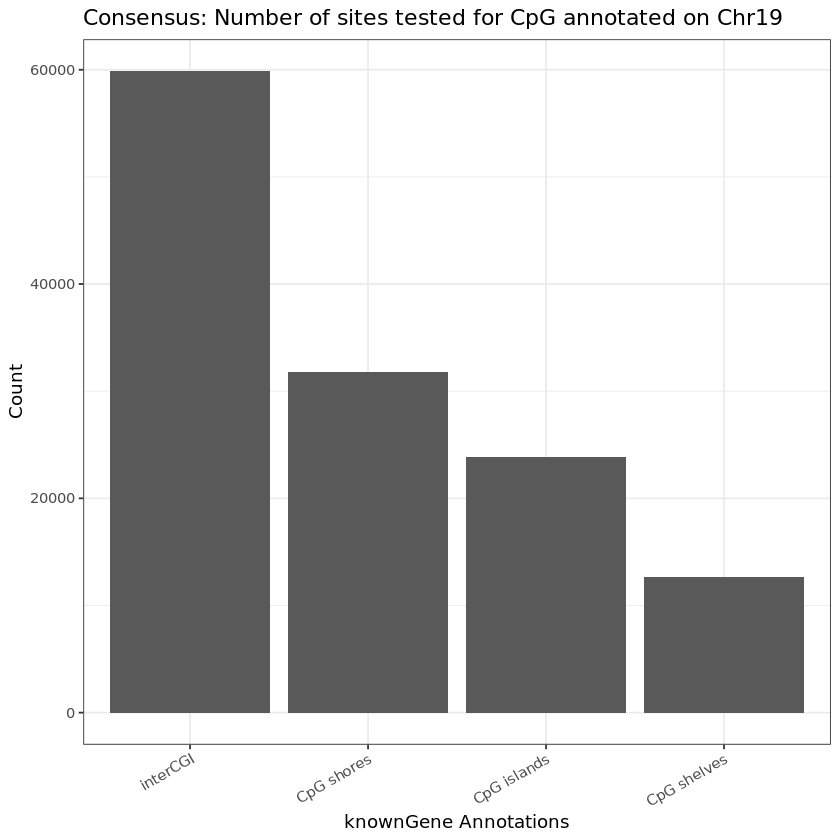

In [116]:
dm_annotated = annotate_regions(
    regions = consensus_bed_chr19,
    annotations = annotations,
    ignore.strand = TRUE,
    quiet = FALSE)

df_dm_annotated = data.frame(dm_annotated)
# print(head(df_dm_annotated))

dm_annsum = summarize_annotations(
    annotated_regions = dm_annotated,
    quiet = TRUE)
print(dm_annsum)

 plot_annotation(
    annotated_regions = dm_annotated,
     annotation_order = c('hg38_cpg_inter','hg38_cpg_shores','hg38_cpg_islands','hg38_cpg_shelves'),

    plot_title = 'Consensus: Number of sites tested for CpG annotated on Chr19',
    x_label = 'knownGene Annotations',
    y_label = 'Count')

# summarize_numerical(
#     annotated_regions = dm_annotated,
#     by = c('annot.type', 'annot.id'),
#     over = c('hg38_cpg_inter','hg38_cpg_islands','hg38_cpg_shelves','hg38_cpg_shores'),
#     quiet = TRUE)


Annotating...



# A tibble: 4 × 2
  annot.type           n
  <chr>            <int>
1 hg38_cpg_inter    2136
2 hg38_cpg_islands  5194
3 hg38_cpg_shelves   521
4 hg38_cpg_shores   1979


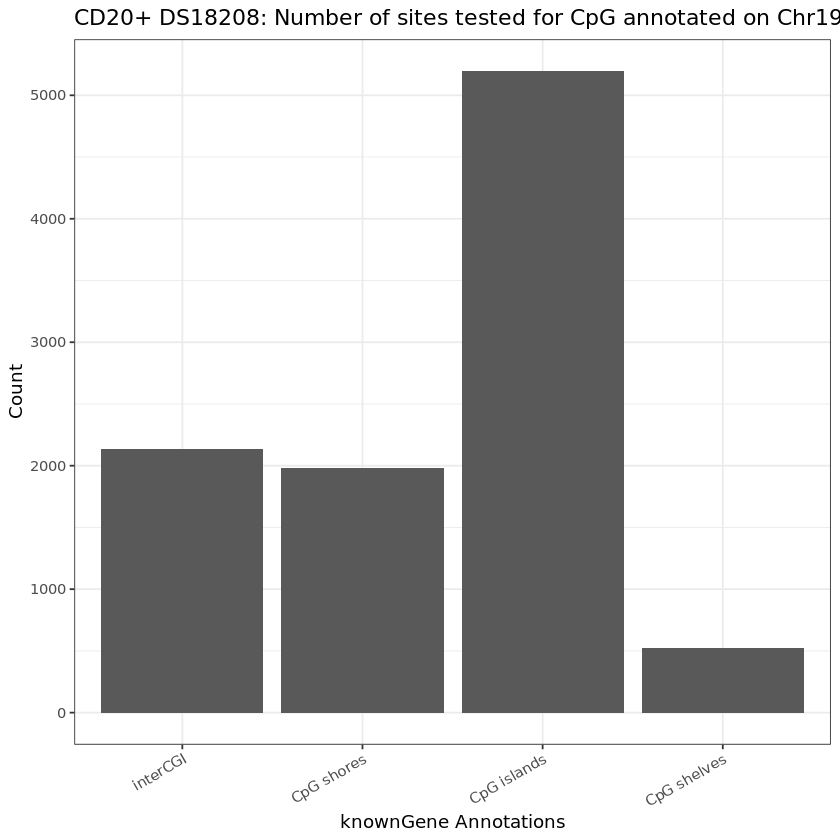

In [165]:
dm_annotated = annotate_regions(
    regions = cd20_beds[['cd20_0.0001']],
    annotations = annotations,
    ignore.strand = TRUE,
    quiet = FALSE)

df_dm_annotated = data.frame(dm_annotated)
# print(head(df_dm_annotated))

dm_annsum = summarize_annotations(
    annotated_regions = dm_annotated,
    quiet = TRUE)
print(dm_annsum)

 plot_annotation(
    annotated_regions = dm_annotated,
     annotation_order = c('hg38_cpg_inter','hg38_cpg_shores','hg38_cpg_islands','hg38_cpg_shelves'),
    plot_title = 'CD20+ DS18208: Number of sites tested for CpG annotated on Chr19',
    x_label = 'knownGene Annotations',
    y_label = 'Count')


Annotating...



  seqnames    start      end width strand V4    V5 annot.seqnames annot.start
1    chr19 48363983 48364005    23      *  . 1e-04          chr19    48363931
2    chr19 48364033 48364045    13      *  . 1e-04          chr19    48363931
3    chr19 48364048 48364071    24      *  . 1e-04          chr19    48363931
4    chr19 48364093 48364116    24      *  . 1e-04          chr19    48363931
5    chr19 48364118 48364127    10      *  . 1e-04          chr19    48363931
6    chr19 48364142 48364156    15      *  . 1e-04          chr19    48363931
  annot.end annot.width annot.strand     annot.id annot.tx_id annot.gene_id
1  48364350         420            * island:14832          NA            NA
2  48364350         420            * island:14832          NA            NA
3  48364350         420            * island:14832          NA            NA
4  48364350         420            * island:14832          NA            NA
5  48364350         420            * island:14832          NA            N

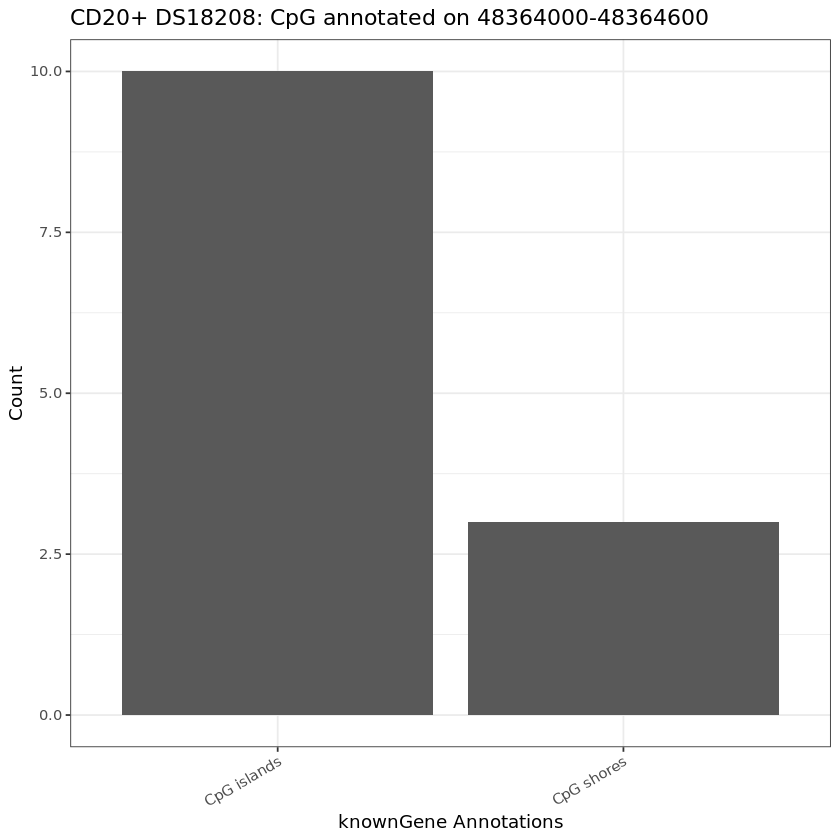

In [136]:
q=GRanges(seqnames="chr19",
          ranges=IRanges(start = 48364000, end = 48364600))
demo <- subsetByOverlaps(cd20_beds[['cd20_0.0001']], q)

dm_annotated = annotate_regions(
    regions = demo,
    annotations = annotations,
    ignore.strand = TRUE,
    quiet = FALSE)

df_dm_annotated = data.frame(dm_annotated)
print(head(df_dm_annotated))

dm_annsum = summarize_annotations(
    annotated_regions = dm_annotated,
    quiet = TRUE)
print(dm_annsum)

 plot_annotation(
    annotated_regions = dm_annotated,
    plot_title = 'CD20+ DS18208: CpG annotated on 48364000-48364600',
    x_label = 'knownGene Annotations',
    y_label = 'Count')

In [121]:
map_test <- read_regions('/home/jupyter/human-TF-footprinting/Data/mappability.stranded.hg38.bed')

In [123]:
map_bed_chr19 <- map_bed[map_bed@seqnames == 'chr19']

Given a set of annotated regions, it is important to know how the annotations compare to those of a randomized set of regions. The randomize_regions() function is a wrapper of regioneR::randomizeRegions() from the regioneR package that creates a set of random regions given a GRanges object. After creating the random set, they must be annotated with annotate_regions() for later use. Only builtin_genomes() can be used in our wrapper function. Downstream functions that support using random region annotations are summarize_annotations(), plot_annotation(), and plot_categorical().

It is important to note that if the regions to be randomized have a particular property, for example they are CpGs, the randomize_regions() wrapper will not preserve that property! Instead, we recommend using regioneR::resampleRegions() with universe being the superset of the data regions you want to sample from.

In [22]:
q=GRanges(seqnames="chr19",
          ranges=IRanges(start = 48364000, end = 48364600))
cd20_chr19_subset <- subsetByOverlaps(cd20_beds[['cd20_0.0001']], q)
consensus_bed_chr19_subset <- subsetByOverlaps(consensus_bed_chr19, q)
map_bed_chr19_subset <- subsetByOverlaps(map_bed_chr19, q)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'subsetByOverlaps': object 'map_bed_chr19' not found


In [155]:
numOverlaps(cd20_chr19_subset, map_bed_chr19_subset, count.once=TRUE)
numOverlaps(consensus_bed_chr19_subset, map_bed_chr19_subset, count.once=TRUE)

[1] 12

[1] 16

In [164]:
boot_test <- permTest(A=consensus_bed_chr19_subset, B=map_bed_chr19_subset,
                ntimes=10,
                randomize.function=resampleRegions,
                universe=map_bed_chr19_subset,
                replace=TRUE,
                evaluate.function=numOverlaps)

[1] "Note: The minimum p-value with only 10 permutations is 0.0909090909090909. You should consider increasing the number of permutations."


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'i' in selecting a method for function '[': cannot take a sample larger than the population when 'replace = FALSE'


In [139]:
# mask <- subtractRegions('hg38', map_bed_chr19)


# new.regions <- createRandomRegions(nregions = num.regions, length.mean = region.length,
#                                    length.sd = 0, genome = genome, mask = mask,
#                                    non.overlapping = TRUE)

In [129]:
# Randomize the input regions
dm_random_regions = randomize_regions(
    regions = map_bed_chr19,
    allow.overlaps = TRUE,
    per.chromosome = TRUE)

In [ ]:
# Annotate the random regions using the same annotations as above
# These will be used in later functions
dm_random_annotated = annotate_regions(
    regions = dm_random_regions,
    annotations = annotations,
    ignore.strand = TRUE,
    quiet = TRUE)

In [8]:
a <- data.frame("length" = c(width(cd20_beds[['cd20_0.0001']]), width(consensus_bed_chr19)),
                 "group" = c(rep("cd20_0.0001", length(cd20_beds[['cd20_0.0001']])),
                             rep("consensus", length(consensus_bed_chr19)))
)

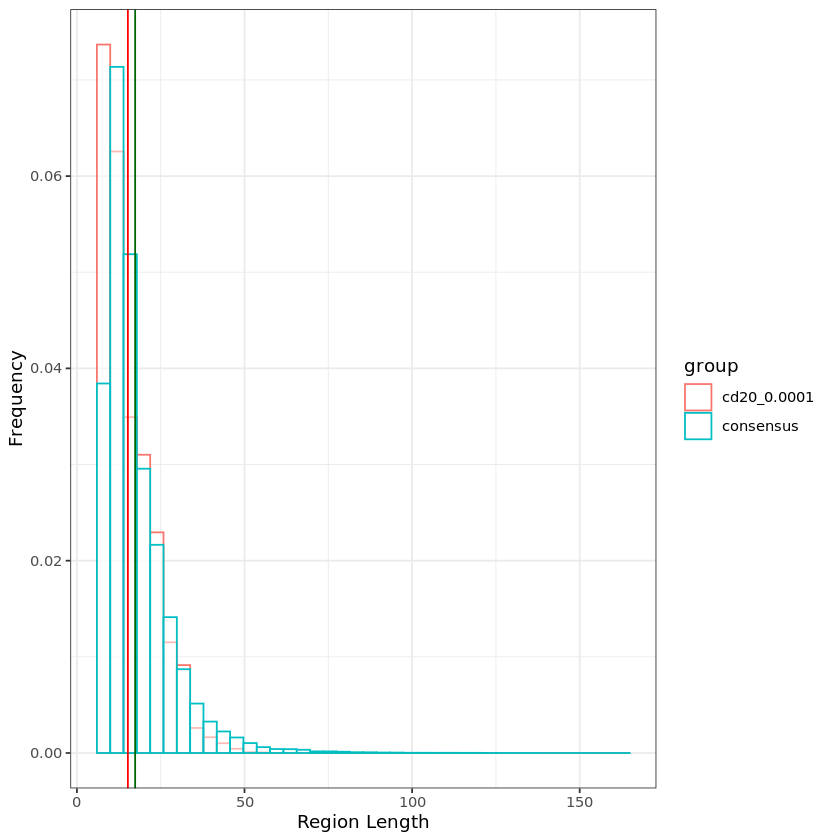

In [11]:
 ggplot(a, aes(x=length, color=group)) +
   geom_histogram(aes(y=..density..), fill="white", alpha=0.5, position="identity", bins = 40) +
   theme_bw() +
   geom_vline(xintercept = mean(a[a$group == "cd20_0.0001", "length"]), color="red") +
   geom_vline(xintercept = mean(a[a$group == "consensus", "length"]), color="darkgreen") +
   xlab("Region Length") + ylab("Frequency")

In [128]:
# consensus_bed_chr19[consensus_bed_chr19$V5==max(consensus_bed_chr19$V5)]

In [56]:
# consensus_bed_chr19[seqnames(consensus_bed_chr19) == "chr19"
#                     & start(consensus_bed_chr19) > 48364000 & end(consensus_bed_chr19) < 48364600] 

In [57]:
# barplot(consensus_bed_chr19$V5)

In [71]:
# consensus_bed_chr19_subset <- consensus_bed_chr19[consensus_bed_chr19$V6>=20]
# summary(glm(chr ~ num_fps, family=poisson, data=consensus_glm_df))

In [59]:
consensus_boxplot_df <- data.frame(chr=consensus_bed@seqnames,
                               num_fps=consensus_bed$V7,
                               width=consensus_bed$V8)

pairwise.wilcox.test(consensus_boxplot_df$Y, 
                     consensus_boxplot_df$X,
                     p.adjust.method="bonf")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  consensus_boxplot_df$Y and consensus_boxplot_df$X 

      chr1    chr10   chr11   chr12   chr13   chr14   chr15   chr16   chr17  
chr10 < 2e-16 -       -       -       -       -       -       -       -      
chr11 0.00011 < 2e-16 -       -       -       -       -       -       -      
chr12 1.7e-05 < 2e-16 1.00000 -       -       -       -       -       -      
chr13 < 2e-16 < 2e-16 < 2e-16 < 2e-16 -       -       -       -       -      
chr14 6.5e-10 6.2e-06 1.00000 1.00000 < 2e-16 -       -       -       -      
chr15 0.74655 < 2e-16 1.00000 1.00000 < 2e-16 0.22371 -       -       -      
chr16 1.00000 < 2e-16 0.02457 0.00836 < 2e-16 2.6e-06 1.00000 -       -      
chr17 < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 -      
chr18 < 2e-16 < 2e-16 < 2e-16 < 2e-16 1.00000 < 2e-16 < 2e-16 < 2e-16 < 2e-16
chr19 < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16
ch

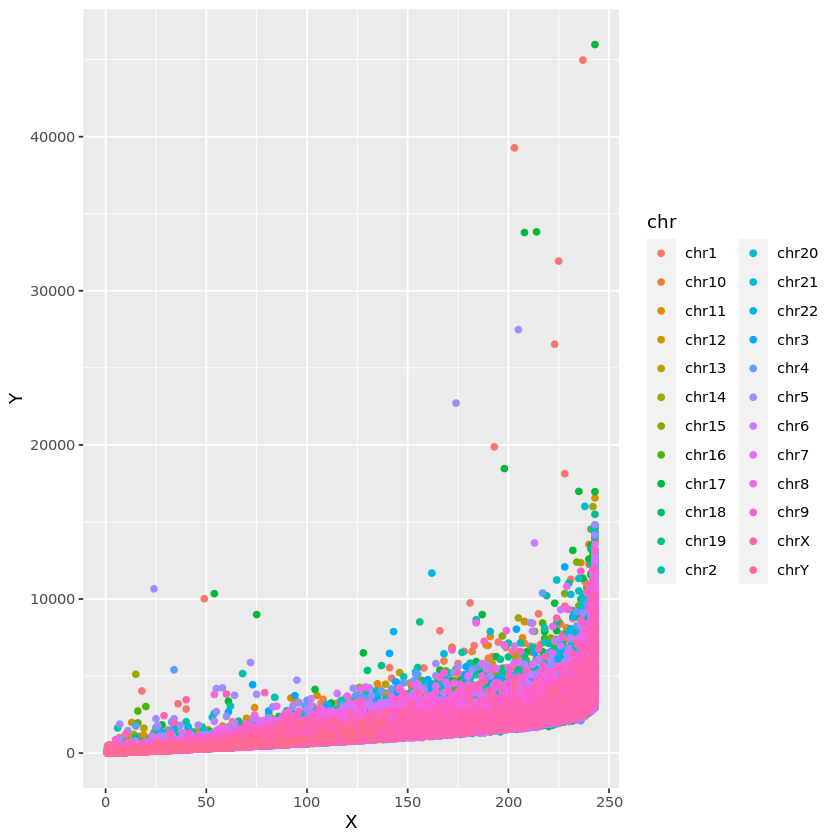

In [48]:
q=GRanges(seqnames="chr19",
          ranges=IRanges(start = 48364000, end = 48364600))

demo <- subsetByOverlaps(consensus_bed_chr19_motifs, q)

consensus_plot_df <- data.frame(X=demo$V6, Y=demo$V5)
# consensus_plot_df <- data.frame(X=consensus_bed$V6, Y=consensus_bed$V5, chr=consensus_bed@seqnames)

ggplot(data=consensus_plot_df, aes(x=X, y=Y, color=chr)) + geom_point()

# Line plot
# ggplot(data=consensus_plot_df, aes(x=X, y=Y, group=chr)) +
#   geom_line(color="red")+
#   geom_point()

In [130]:
# consensus_bed_chr19_motifs <- consensus_bed_chr19[!(consensus_bed_chr19$V12==""), ]